# Pytorch Workflow

Let's explore an example Pytorch end-t0-end workflow.

what_we_are_covering =
                        {1: "data (prepare and load)",
                        2: "build model",
                        3: "fitting the model to data (training)",
                        4: "making predictions and evaluating a model (inference)",
                        5: "saving and loading a model",
                        6: "putting it all together"}
                      


In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu121'

##  1. Data (preparind and loading)
 Data can be almost anything.
 * Excel spreadsheet
 * Images of any kind
 * Videos (YouTube has lots of data)
 * Audio like songs or podcasts
 * DNA.
 * Text

 Machine Learning is a game of two parts:
 1. Get data into a numerical Representation.
 2. Build a model to learn patterns in that numerical representation.

 Let us create some ** known ** data using linear regression formular

 we'll use a linear regression formula to make a straight line with known ** parameters **

In [ ]:
# Create *known* parameters
weight = 0.7 # b
bias = 0.3 # a

# Create
start = 0
end = 1
step = 0.02


X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

###### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.

In [ ]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

How can we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize = (10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  # Plot test data in red
  plt.scatter(test_data, test_labels, c="r", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="g", label="predictions")

  # Show the legend
  plt.legend(prop= {"size":14});

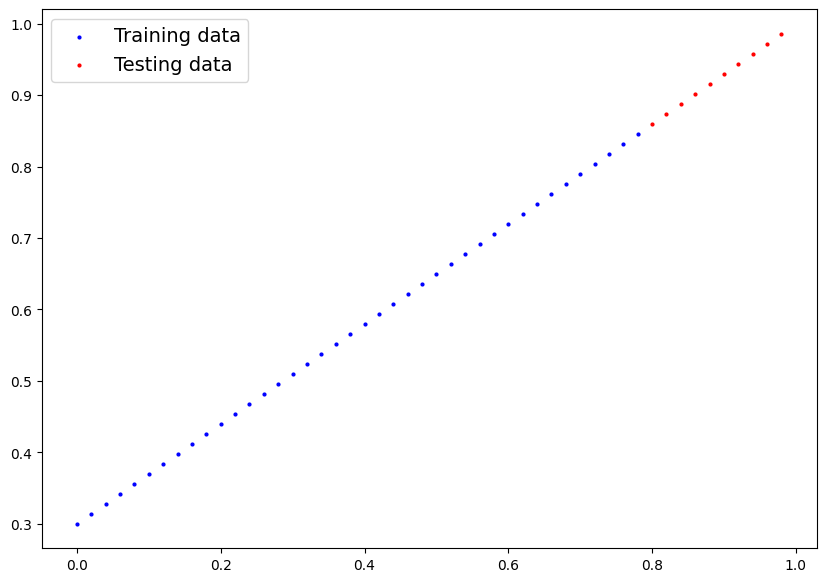

In [ ]:

plot_predictions();

## 2. Build model

Our first PyTorch model

To get familiar with OOP, Use :https://realpython.com/python3-object-oriented-programming/

What our model does:
* Start with random values(weight & bias)
* Look at training data and adjust the random values to better represent the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent - https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropagation - https://youtu.be/Ilg3gGewQ5U?si=GIl2s_vSyWxvZSwX

In [ ]:
from torch import nn

# Create a linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in PyTorch inherits from nn.Model
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: #<- "x" is the input data
    return self.weights*x + self.bias # this is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all of the building blocks for computational graphs (a neural network can be considered as a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in computation

check PyTorch Cheat Sheet: https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Now we've  created a model, let's see what's inside...
We can check our model parameters or what is inside our model using '.parameters()'


In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

### Making prediction using 'torch.inference_mode()'

To check our model's predictive power,  let's see how well it predicts'y_test' based on 'X_test'.

When we pass data through our model, it is going to ru it through the forward() method.

In [ ]:
# Make predictions with model
with torch.inference_mode(): # You can also do something similar with "with torch.no_grad()", however "with torch.inference_mode()" is preferred
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

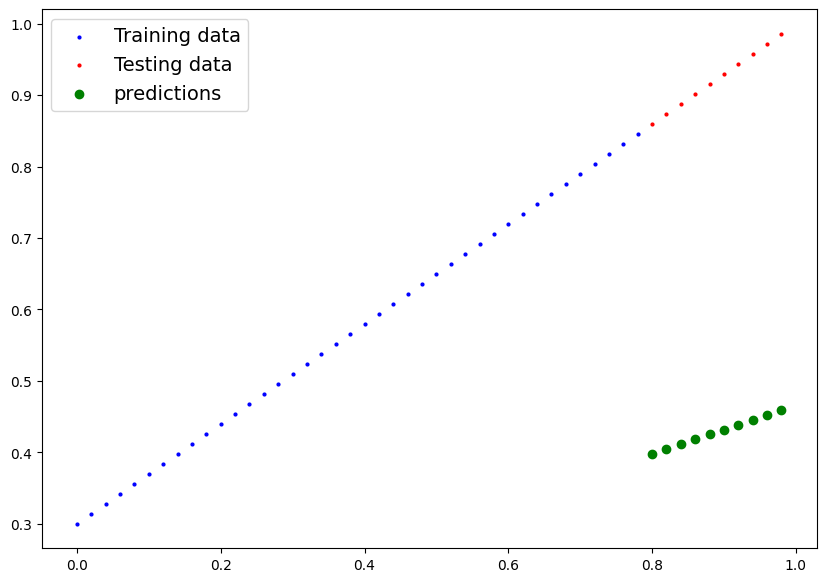

In [ ]:
plot_predictions(predictions = y_preds)

## 3. Train model

The whole idea of training is for a model to move from *unknown* parameters (these minght be random) to some *known* parameters.

Or in otherwords from a poor representation of the data to a better one.

One way to measure how poor or how wrong a model's predictions are is: "to use a loss function"

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we are going to refer to it as a loss function

* **Loss function:** A function that measures how wrong your model's predictions are to the ideal output.

* **Optimizer:** takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias) to improve the loss function. https://pytorch.org/docs/stable/optim.html

And specifically for PyTorch, we need:
 * A training loop
 * A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD (params = model_0.parameters(),
                             lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set


### Building a training (and a testing) loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data.
1. Forward pass (this involves data moving through our model's 'forward()' functions) to make predictions on data - also called forward propagation.
2. Calculate the loss (compare forward pass predictions to ground truth labels).
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradient of each of the paramereters of our model with reespect to the loss (**backpropagation**).
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [ ]:
# An epoch is one loop through the data (this is a hyperparameter because we set it ourselves)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)
  model_0.eval() # turns off gradient tracking

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batchNorm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
  # with torch.no_grad(): # you may also see torc.no_grad() in older PyTorch code
    # Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss} ")

    # Print out model state_dict()
    print(model_0.state_dict())

loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495 
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
loss: 0.3013603389263153
loss: 0.28983935713768005
loss: 0.2783183455467224
loss: 0.26679736375808716
loss: 0.2552763521671295
loss: 0.24375534057617188
loss: 0.23223432898521423
loss: 0.22071333229541779
loss: 0.20919232070446014
loss: 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428 
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
loss: 0.18615034222602844
loss: 0.1746293306350708
loss: 0.16310831904411316
loss: 0.1515873372554779
loss: 0.14006635546684265
loss: 0.1285453587770462
loss: 0.11702437698841095
loss: 0.1060912236571312
loss: 0.09681284427642822
loss: 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688 
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
loss: 0.08227583020925522
loss

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).numpy())

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

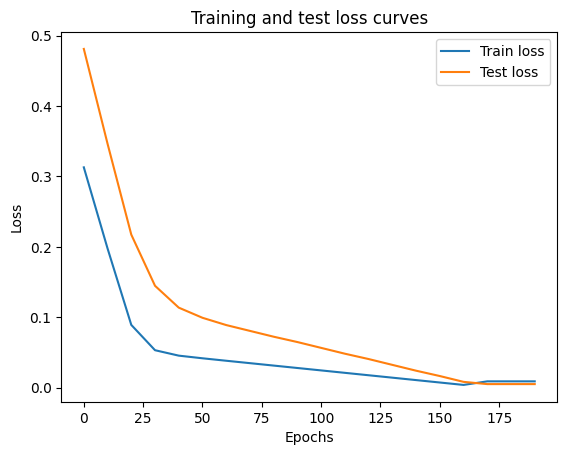

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

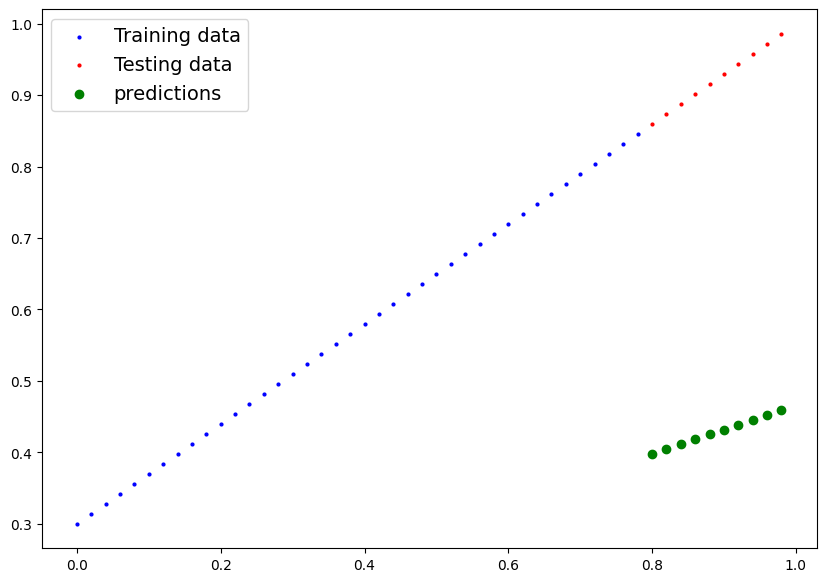

In [ ]:
plot_predictions(predictions=y_preds)

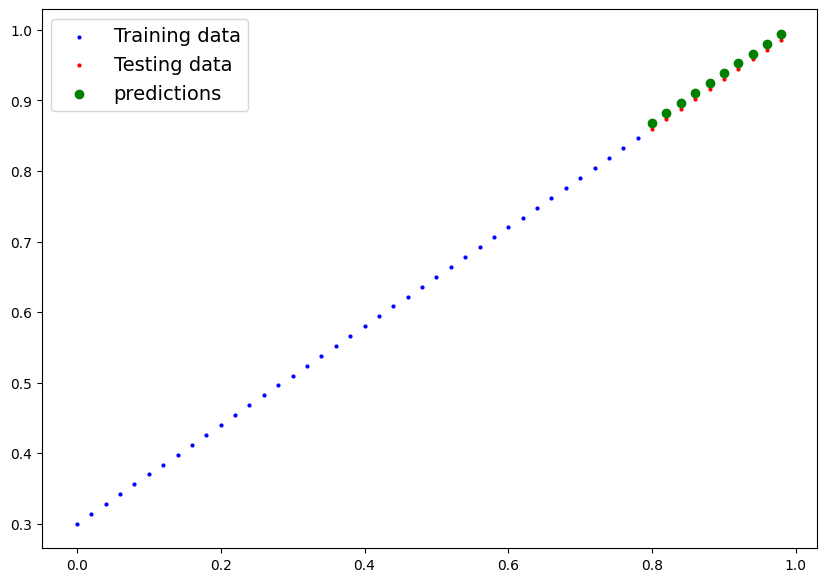

In [ ]:
plot_predictions(predictions=y_preds_new)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

### Saving a model in PyTorch

There are three main methods for saving and loading models in PyTorch.

1. 'torch.save()' - allows you save a PyTorch object in Python's pickle format
2. 'torch.load()' - allows you to load or save PyTorch object
3. 'torch.nn.Module.load_state_dict()' - this allows to load a model's saved state dictionary

yTorch save $ load code tutorial + extra-curriculum - https://pytorch.org/tutorials/beginner/saving_loading_models.html


In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
! ls -1 models

01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's 'state_dict()' rather than the entire model, we'll create a new instance of our model class and load the saved 'state_dict()' into that.

In [ ]:
# To load in a saved stae_dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
# Make some models preds
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Putting it all together
Let's go back through the steps above and see it all in one place

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__

'2.1.0+cu121'

create device-agnostic code.

This means if we have got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using GPU.

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else"cpu"
print(f"Using device: {device}")

Using device: cpu


#### 6.1 Data

In [ ]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
biase = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step). unsqueeze(dim=1) # without unsqueeze, errors will pop up
y =weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

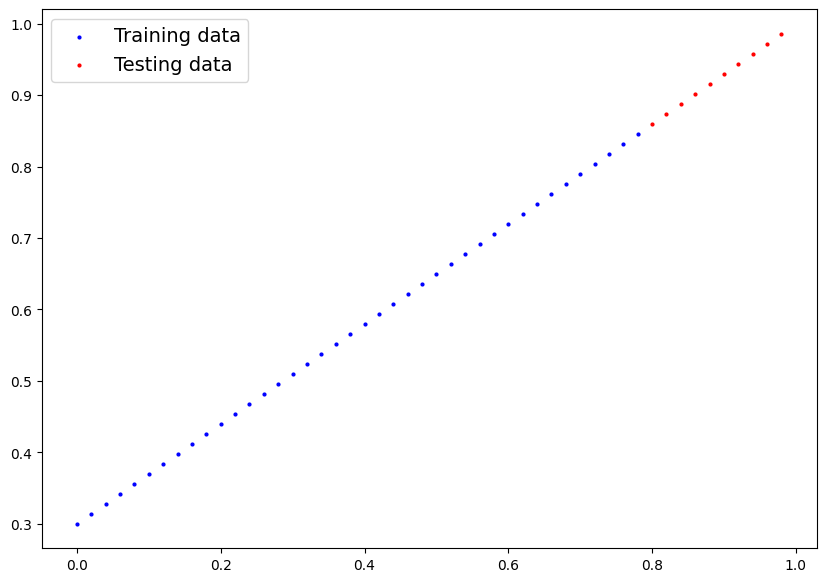

In [ ]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will give error
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Buiding a PyTorch Linear model

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear() for creating the model parameters /also called linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.linear_layer(x)
  # Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()



(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
# Set model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# setup our optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr=0.01)

In [ ]:
# let us write a training loop
torch.manual_seed(42)

epochs=200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range (epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()


  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")




Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.01380180753767

### Making and evaluating predictions

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

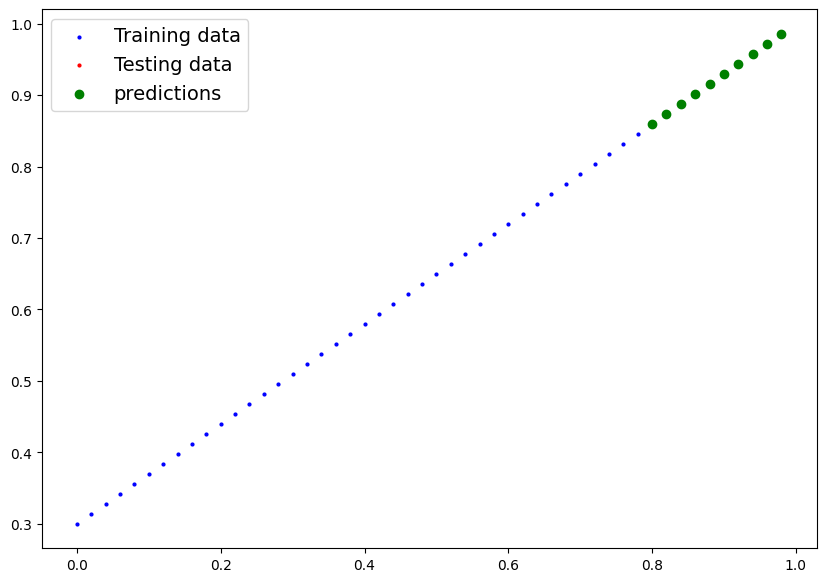

In [ ]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds)

### Saving & loading a trained model

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


### Loading our model

In [ ]:
# To load in a saved stae_dict, we have to instantiate a new instance of our model class
loaded_model_1 = LinearRegressionModelV2()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])